In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score


In [33]:
chemData = pd.read_csv("C:/Users/user/Documents/ChemParams.csv")

In [34]:
#getting top 5 rows of the data

chemData.head()

,Total Dissolved Solid (TDS),Chemical Oxygen Demand (COD),Biochemical Oxygen Demand (BOD),Total Organic Content (TOC),pH,Electrical Conductivity (EC),Turbidity,Hardness,Dissolved Solids
0,114,256,108,0.02,6.0,217,9.00,108.40,411.6
1,18,192,56,0.01,5.0,24,1.30,75.65,201.6
2,38,212,56,0.02,5.7,64,4.80,142.30,224.9
3,9,196,12,0.03,5.8,13,1.52,138.10,733.4
4,41,284,60,0.02,4.5,58,2.10,75.48,358.9


In [35]:
print(chemData.shape)

(8, 9)


In [36]:
print(chemData.columns)

Index(['Total Dissolved Solid (TDS)', 'Chemical Oxygen Demand (COD)',
       'Biochemical Oxygen Demand (BOD)', 'Total Organic Content (TOC)', 'pH',
       'Electrical Conductivity (EC)', 'Turbidity', 'Hardness',
       'Dissolved Solids'],
      dtype='object')


In [37]:
chemData.describe()

,Total Dissolved Solid (TDS),Chemical Oxygen Demand (COD),Biochemical Oxygen Demand (BOD),Total Organic Content (TOC),pH,Electrical Conductivity (EC),Turbidity,Hardness,Dissolved Solids
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,74.750000,221.000000,84.500000,0.02375,5.462500,129.87500,3.357500,104.200000,323.425000
std,76.426903,52.405016,82.404924,0.01598,0.785471,141.70335,2.552269,30.630626,183.829453
min,9.000000,124.000000,12.000000,0.01000,4.500000,13.00000,1.300000,70.360000,194.400000
25%,33.000000,195.000000,50.000000,0.01750,4.950000,49.50000,1.947500,75.607500,204.975000
50%,42.000000,220.000000,58.000000,0.02000,5.350000,67.00000,2.275000,98.555000,240.700000
75%,98.250000,261.000000,84.000000,0.02250,5.850000,171.25000,3.900000,135.475000,372.075000
max,242.000000,284.000000,276.000000,0.06000,6.900000,437.00000,9.000000,142.300000,733.400000


In [38]:
chemData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Total Dissolved Solid (TDS)      8 non-null      int64  
 1   Chemical Oxygen Demand (COD)     8 non-null      int64  
 2   Biochemical Oxygen Demand (BOD)  8 non-null      int64  
 3   Total Organic Content (TOC)      8 non-null      float64
 4   pH                               8 non-null      float64
 5   Electrical Conductivity (EC)     8 non-null      int64  
 6   Turbidity                        8 non-null      float64
 7   Hardness                         8 non-null      float64
 8   Dissolved Solids                 8 non-null      float64
dtypes: float64(5), int64(4)
memory usage: 704.0 bytes


In [39]:
print(chemData.nunique())

Total Dissolved Solid (TDS)        8
Chemical Oxygen Demand (COD)       8
Biochemical Oxygen Demand (BOD)    7
Total Organic Content (TOC)        4
pH                                 7
Electrical Conductivity (EC)       8
Turbidity                          8
Hardness                           8
Dissolved Solids                   8
dtype: int64


In [40]:
print(chemData.isnull().sum())

Total Dissolved Solid (TDS)        0
Chemical Oxygen Demand (COD)       0
Biochemical Oxygen Demand (BOD)    0
Total Organic Content (TOC)        0
pH                                 0
Electrical Conductivity (EC)       0
Turbidity                          0
Hardness                           0
Dissolved Solids                   0
dtype: int64


In [41]:
print(chemData.dtypes)

Total Dissolved Solid (TDS)          int64
Chemical Oxygen Demand (COD)         int64
Biochemical Oxygen Demand (BOD)      int64
Total Organic Content (TOC)        float64
pH                                 float64
Electrical Conductivity (EC)         int64
Turbidity                          float64
Hardness                           float64
Dissolved Solids                   float64
dtype: object


In [42]:
chemData.dtypes

Total Dissolved Solid (TDS)          int64
Chemical Oxygen Demand (COD)         int64
Biochemical Oxygen Demand (BOD)      int64
Total Organic Content (TOC)        float64
pH                                 float64
Electrical Conductivity (EC)         int64
Turbidity                          float64
Hardness                           float64
Dissolved Solids                   float64
dtype: object

In [43]:
#change data to float
chemData.iloc[0:3, 5] - chemData.iloc[0:3, 5].astype(float)

0    0.0
1    0.0
2    0.0
Name: Electrical Conductivity (EC), dtype: float64

In [46]:
chemData.dtypes

Total Dissolved Solid (TDS)          int64
Chemical Oxygen Demand (COD)         int64
Biochemical Oxygen Demand (BOD)      int64
Total Organic Content (TOC)        float64
pH                                 float64
Electrical Conductivity (EC)         int64
Turbidity                          float64
dtype: object

<Axes: >

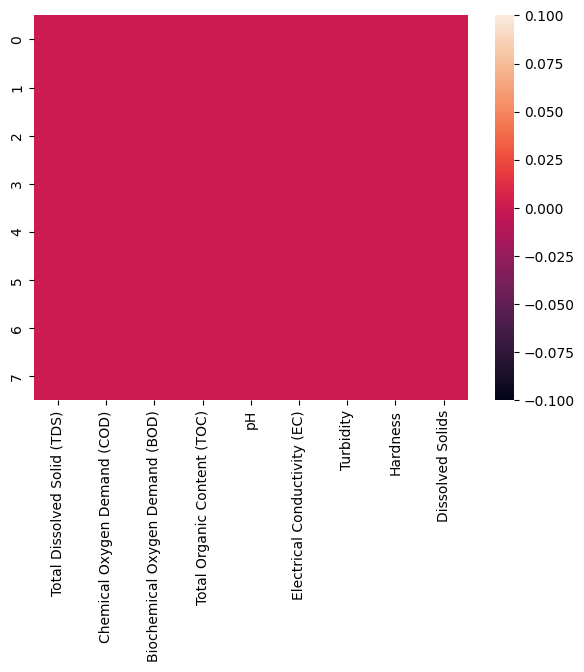

In [44]:
sns.heatmap(chemData.isnull())

<Axes: >

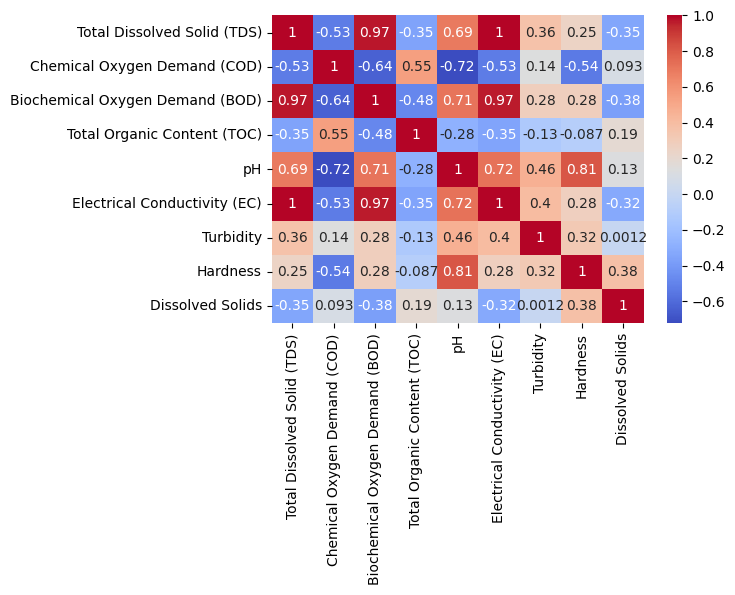

In [45]:
corr = chemData.corr()
corr.head()
fig,ax= plt.subplots(figsize=(6, 4))
#plt.figure(figsize=(10, 8))
sns.heatmap(chemData.corr(), annot= True, cmap= 'coolwarm')

In [48]:
corr = chemData.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Total Dissolved Solid (TDS)   Total Dissolved Solid (TDS)     1.000000
Chemical Oxygen Demand (COD)  Chemical Oxygen Demand (COD)    1.000000
Hardness                      Hardness                        1.000000
Turbidity                     Turbidity                       1.000000
Electrical Conductivity (EC)  Electrical Conductivity (EC)    1.000000
                                                                ...   
Chemical Oxygen Demand (COD)  Dissolved Solids                0.093242
Hardness                      Total Organic Content (TOC)     0.087295
Total Organic Content (TOC)   Hardness                        0.087295
Dissolved Solids              Turbidity                       0.001201
Turbidity                     Dissolved Solids                0.001201
Length: 81, dtype: float64

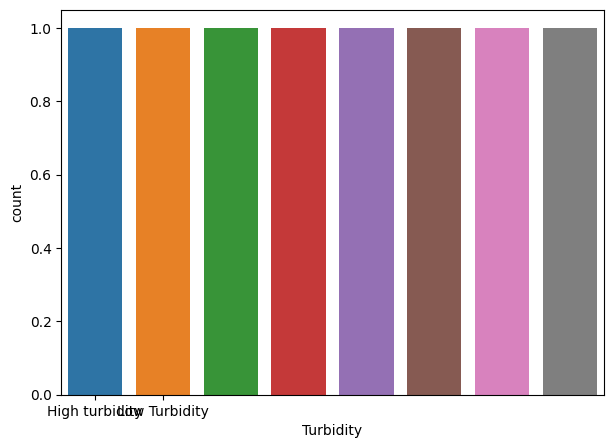

In [47]:
ax = sns.countplot(x = "Turbidity", data = chemData, saturation = 0.8)
plt.xticks(ticks=[0, 1],labels = ["High turbidity", "Low Turbidity"])
plt.show()

In [2]:
import seaborn as sns

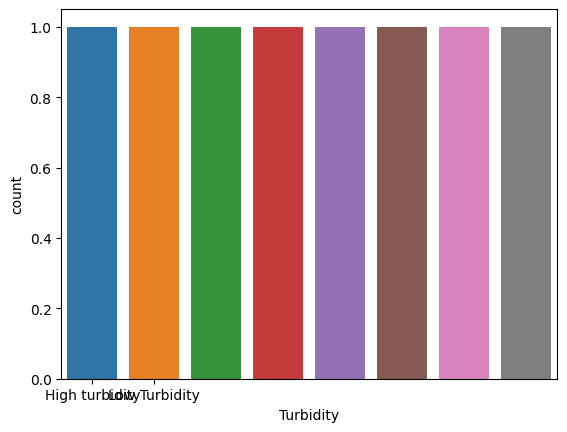

In [7]:
ax = sns.countplot(x = "Turbidity", data = chemData, saturation = 0.8)
plt.xticks(ticks=[0, 1],labels = ["High turbidity", "Low Turbidity"])
plt.show()

In [8]:
x = chemData.Turbidity.value_counts()
labels = [0, 1]
print(x)

9.00    1
1.30    1
4.80    1
1.52    1
2.10    1
2.45    1
2.09    1
3.60    1
Name: Turbidity, dtype: int64


<Axes: xlabel='Total Dissolved Solid (TDS)', ylabel='Dissolved Solids'>

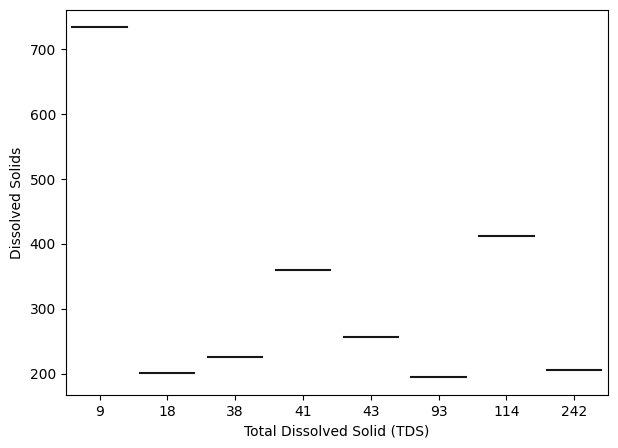

In [49]:
sns.violinplot(x='Total Dissolved Solid (TDS)', y = 'Dissolved Solids', 
               data = chemData, palette = 'rocket')

In [89]:
chemData = pd.read_csv("C:/Users/user/Documents/ChemParams.csv")

In [90]:
chemData.head()

,Total Dissolved Solid (TDS),Chemical Oxygen Demand (COD),Biochemical Oxygen Demand (BOD),Total Organic Content (TOC),pH,Turbidity,Hardness,Electrical Conductivity (EC)
0,114,256,108,0.02,6.0,9.00,108.40,217
1,18,192,56,0.01,5.0,1.30,75.65,24
2,38,212,56,0.02,5.7,4.80,142.30,64
3,9,196,12,0.03,5.8,1.52,138.10,13
4,41,284,60,0.02,4.5,2.10,75.48,58


<Axes: >

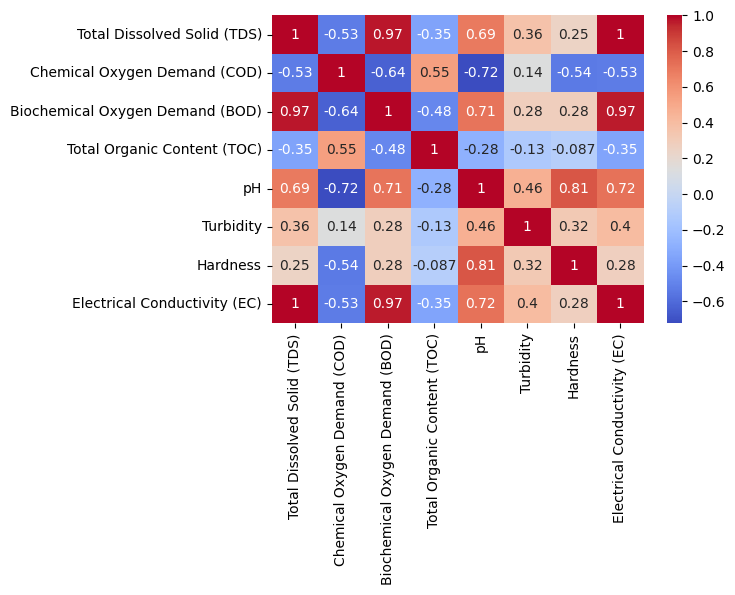

In [91]:
corr = chemData.corr()
corr.head()
fig,ax= plt.subplots(figsize=(6, 4))
#plt.figure(figsize=(10, 8))
sns.heatmap(chemData.corr(), annot= True, cmap= 'coolwarm')

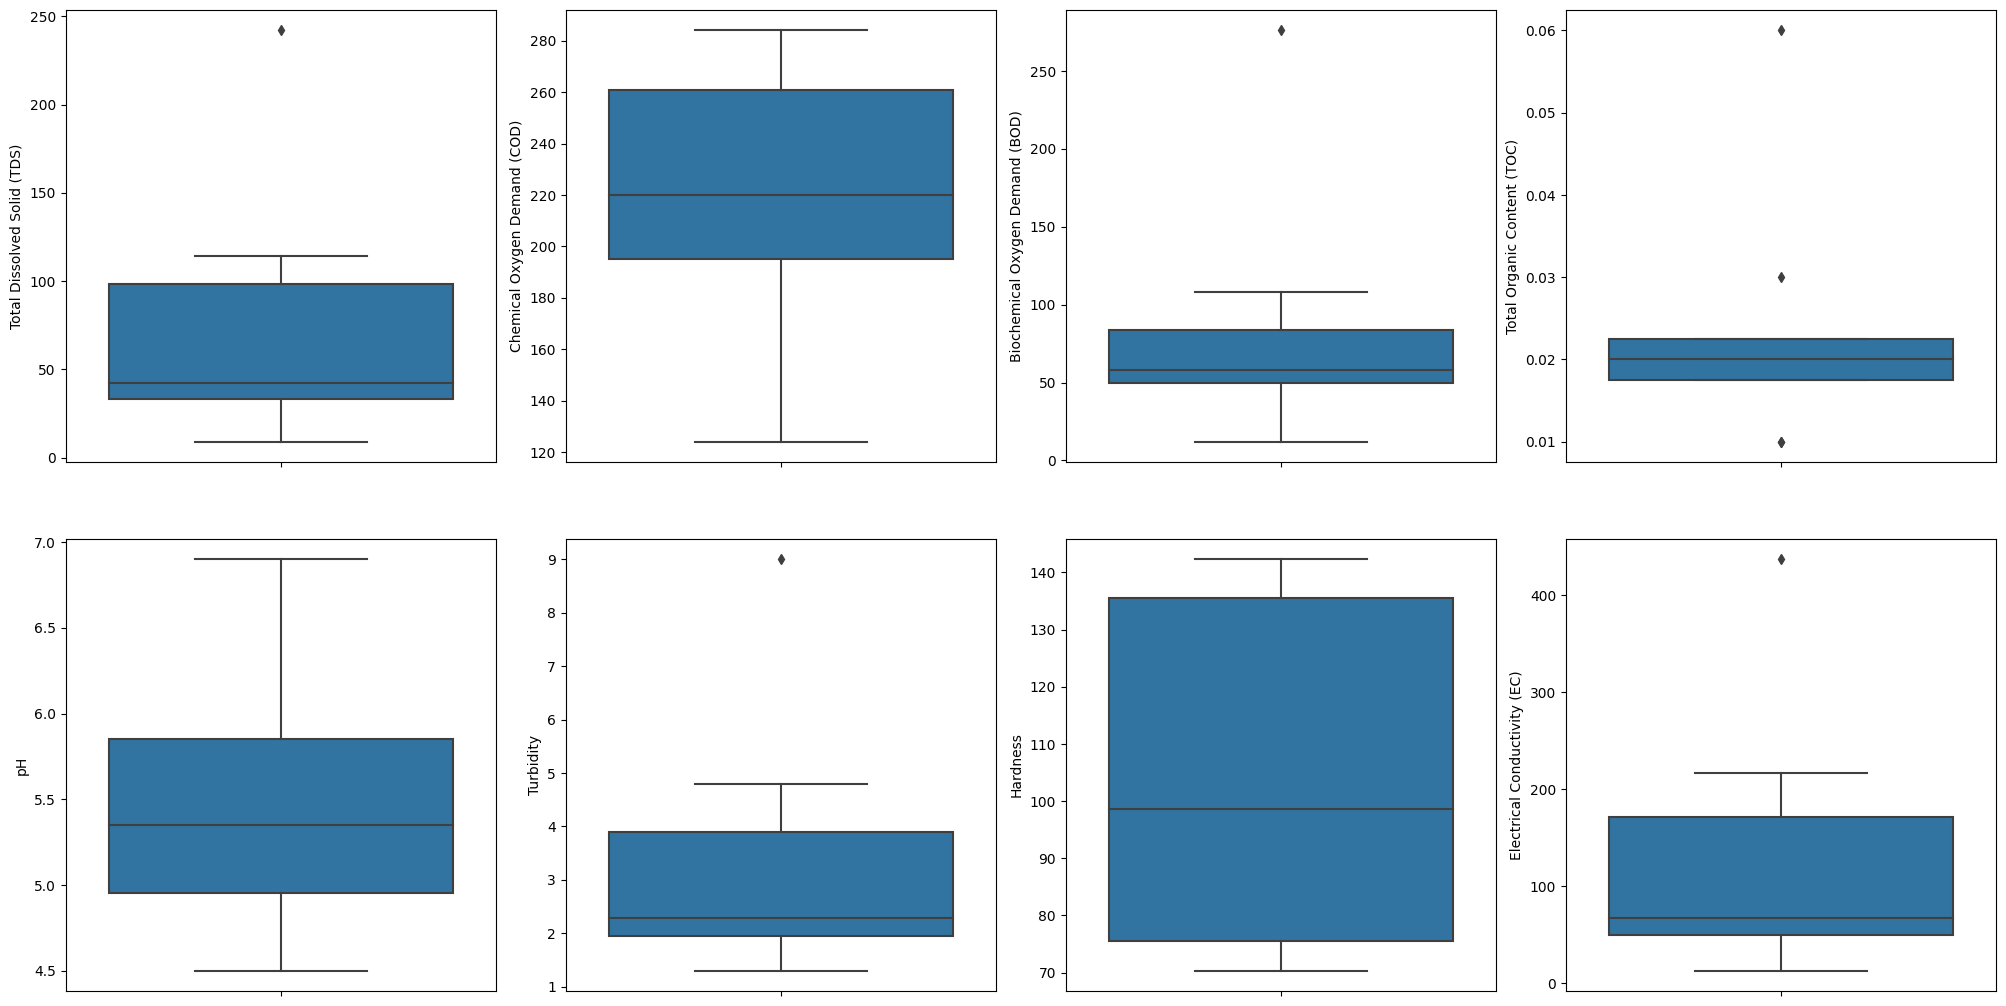

In [93]:
#visualizing datasets and checking for outliers

fig, ax = plt.subplots(ncols = 4, 
nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in chemData.items():
    sns.boxplot(y=col, data=chemData, ax = ax[index])
    index += 1
    plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad=5.0)

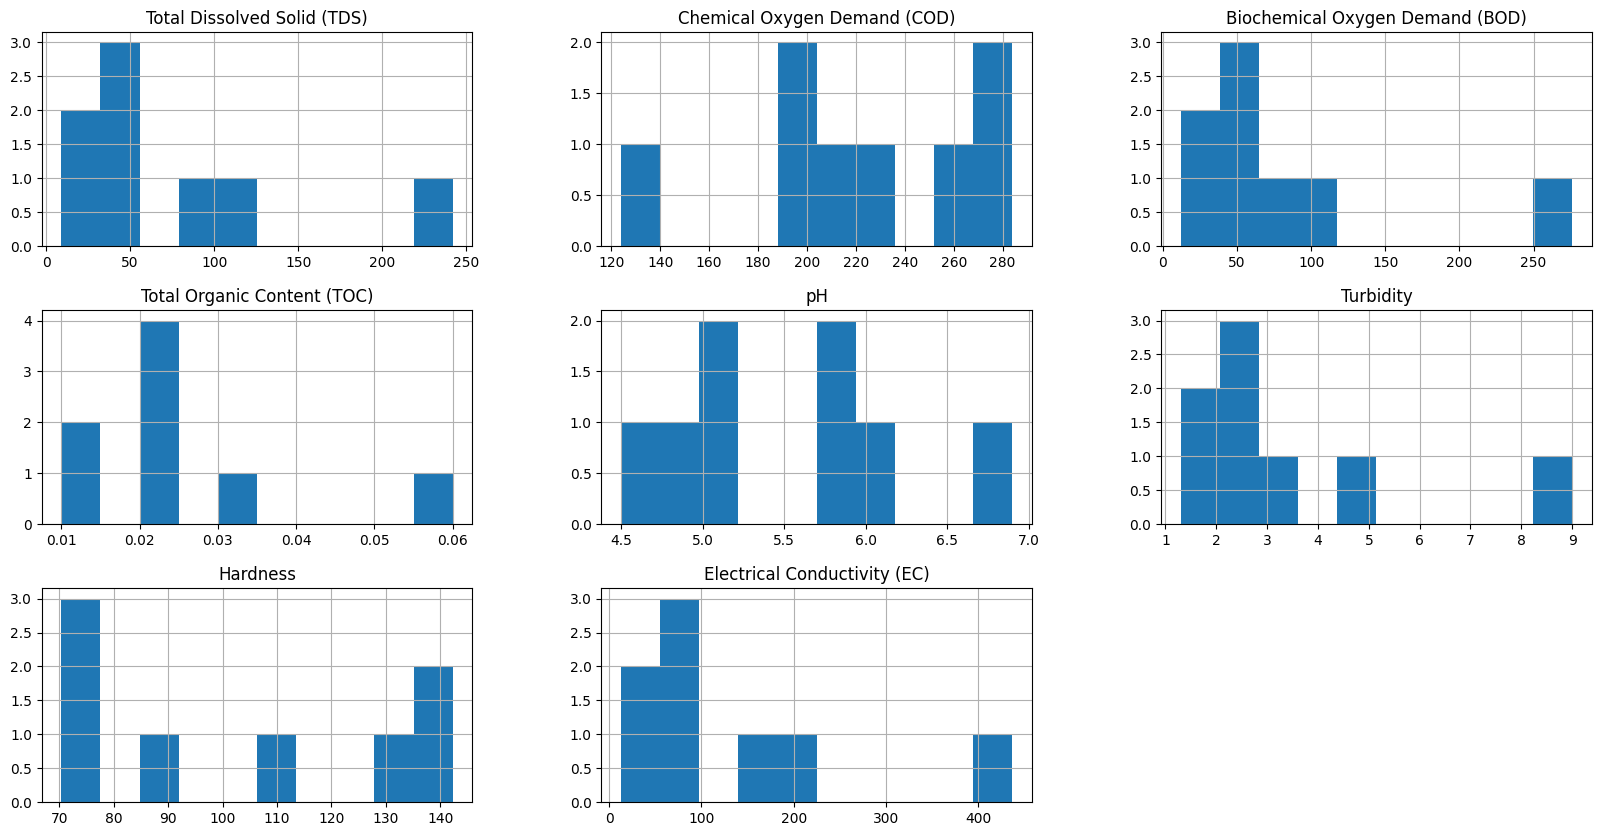

In [94]:
plt.rcParams ['figure.figsize'] = [20, 10]
chemData.hist()
plt.show()

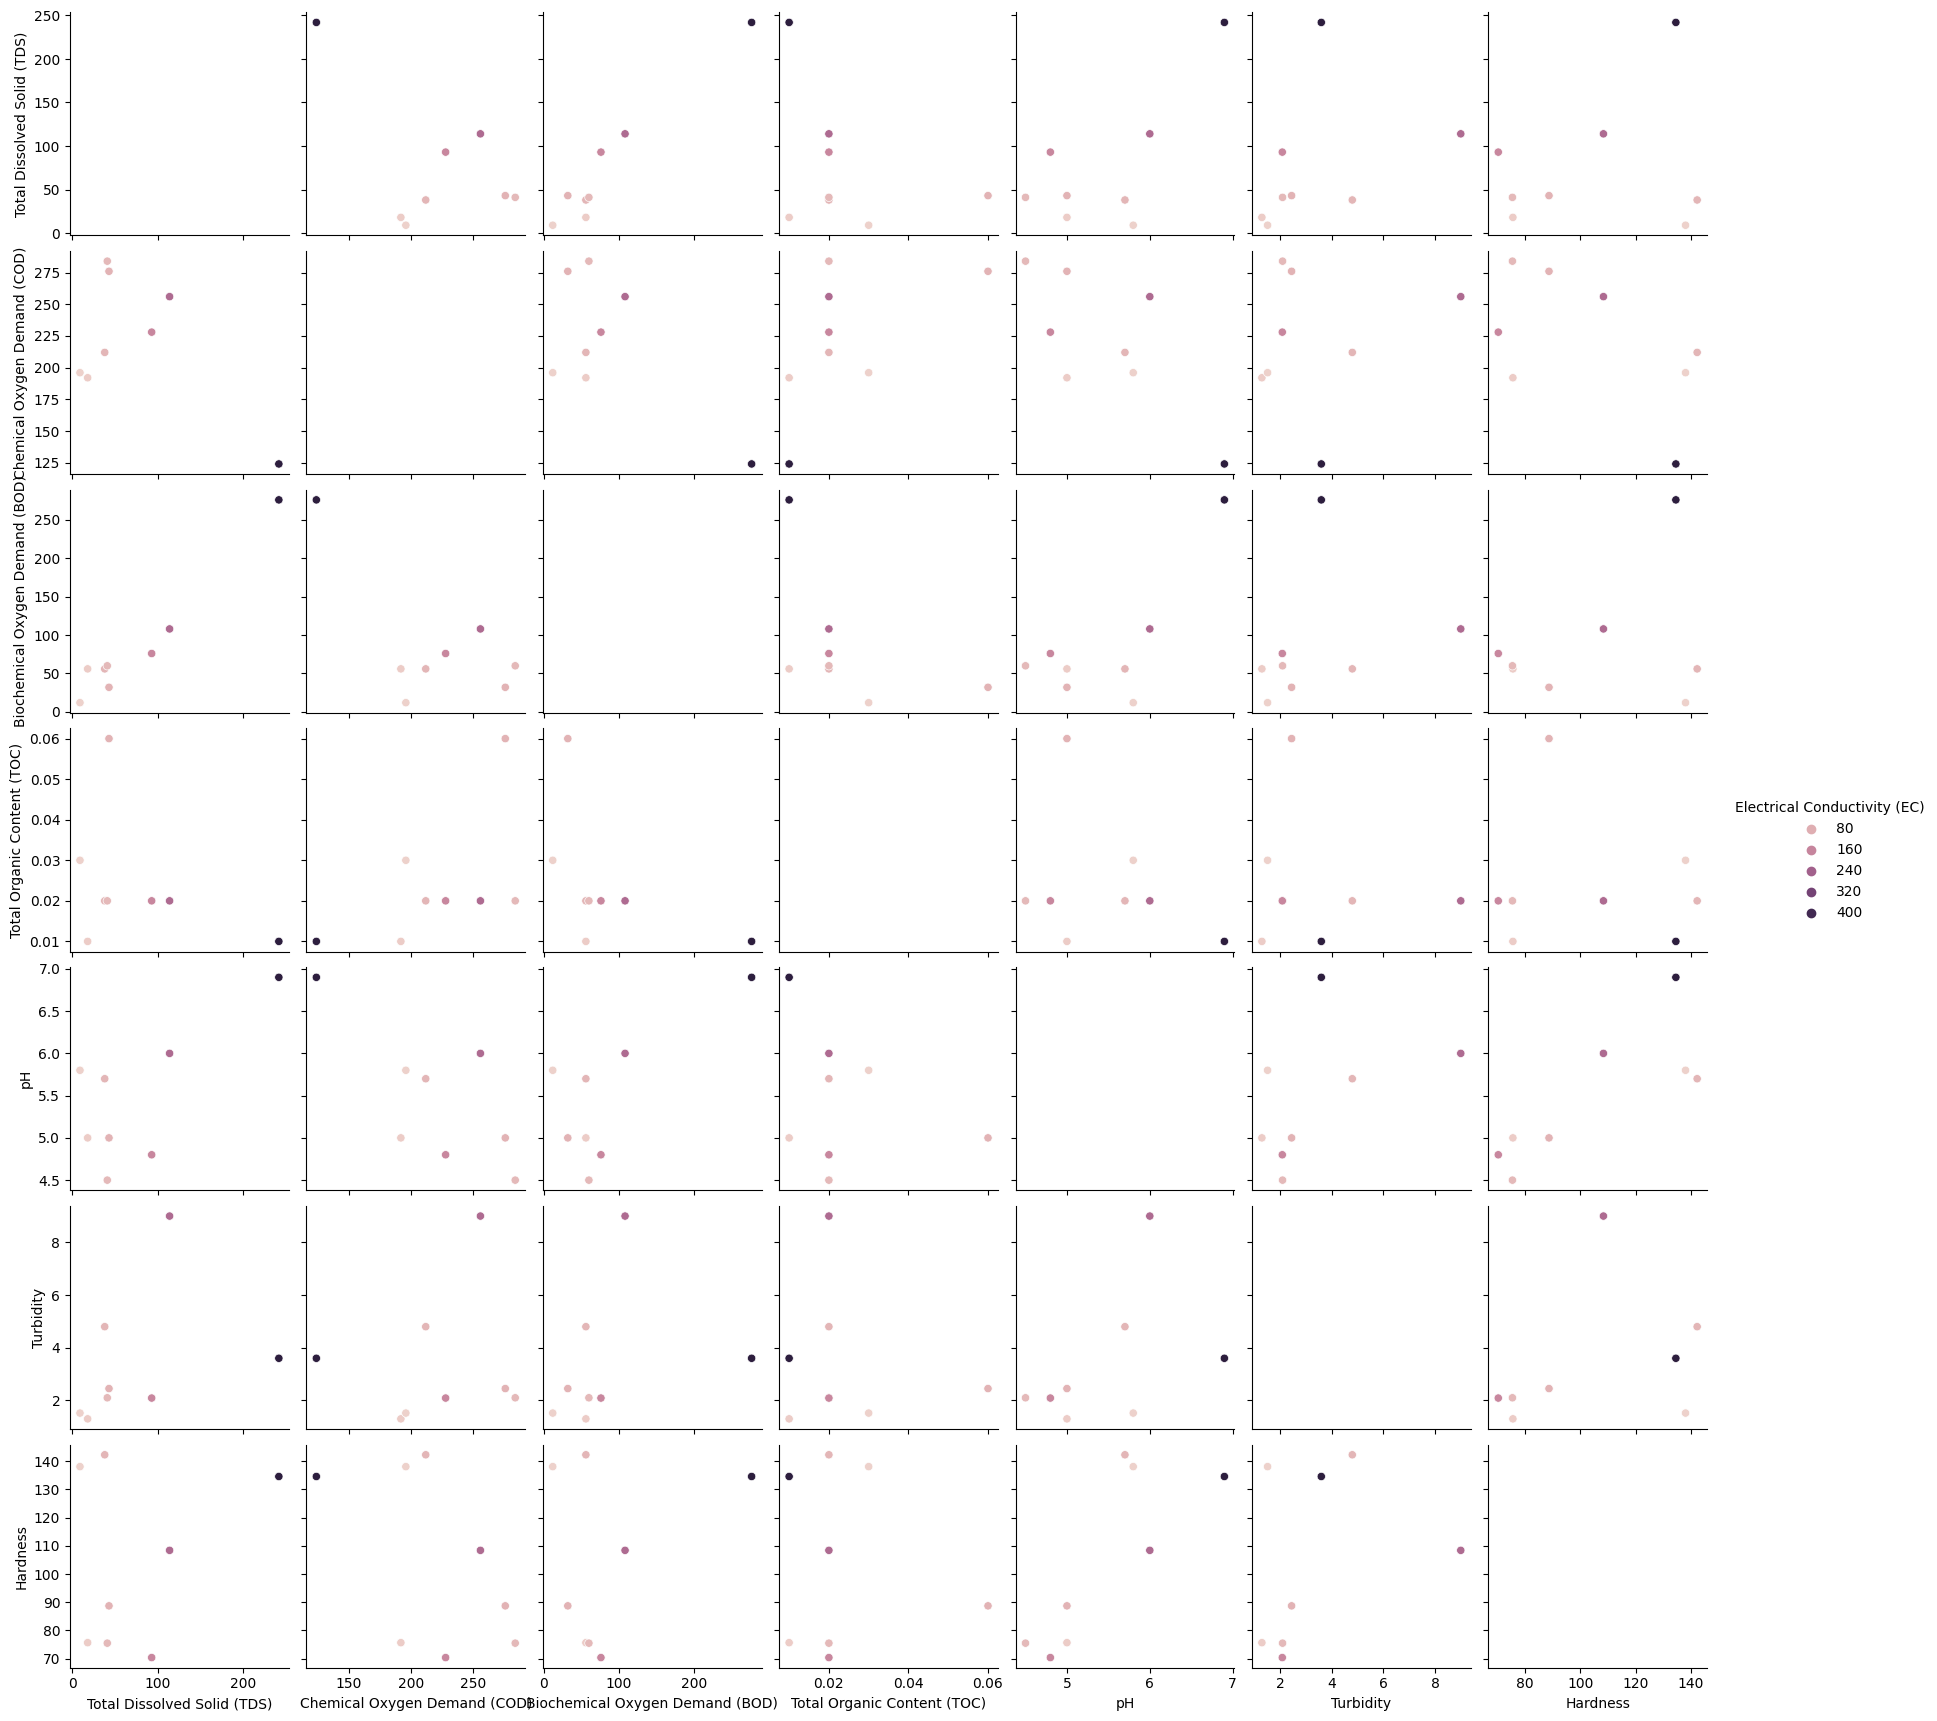

In [95]:
sns.pairplot(chemData, hue="Electrical Conductivity (EC)")

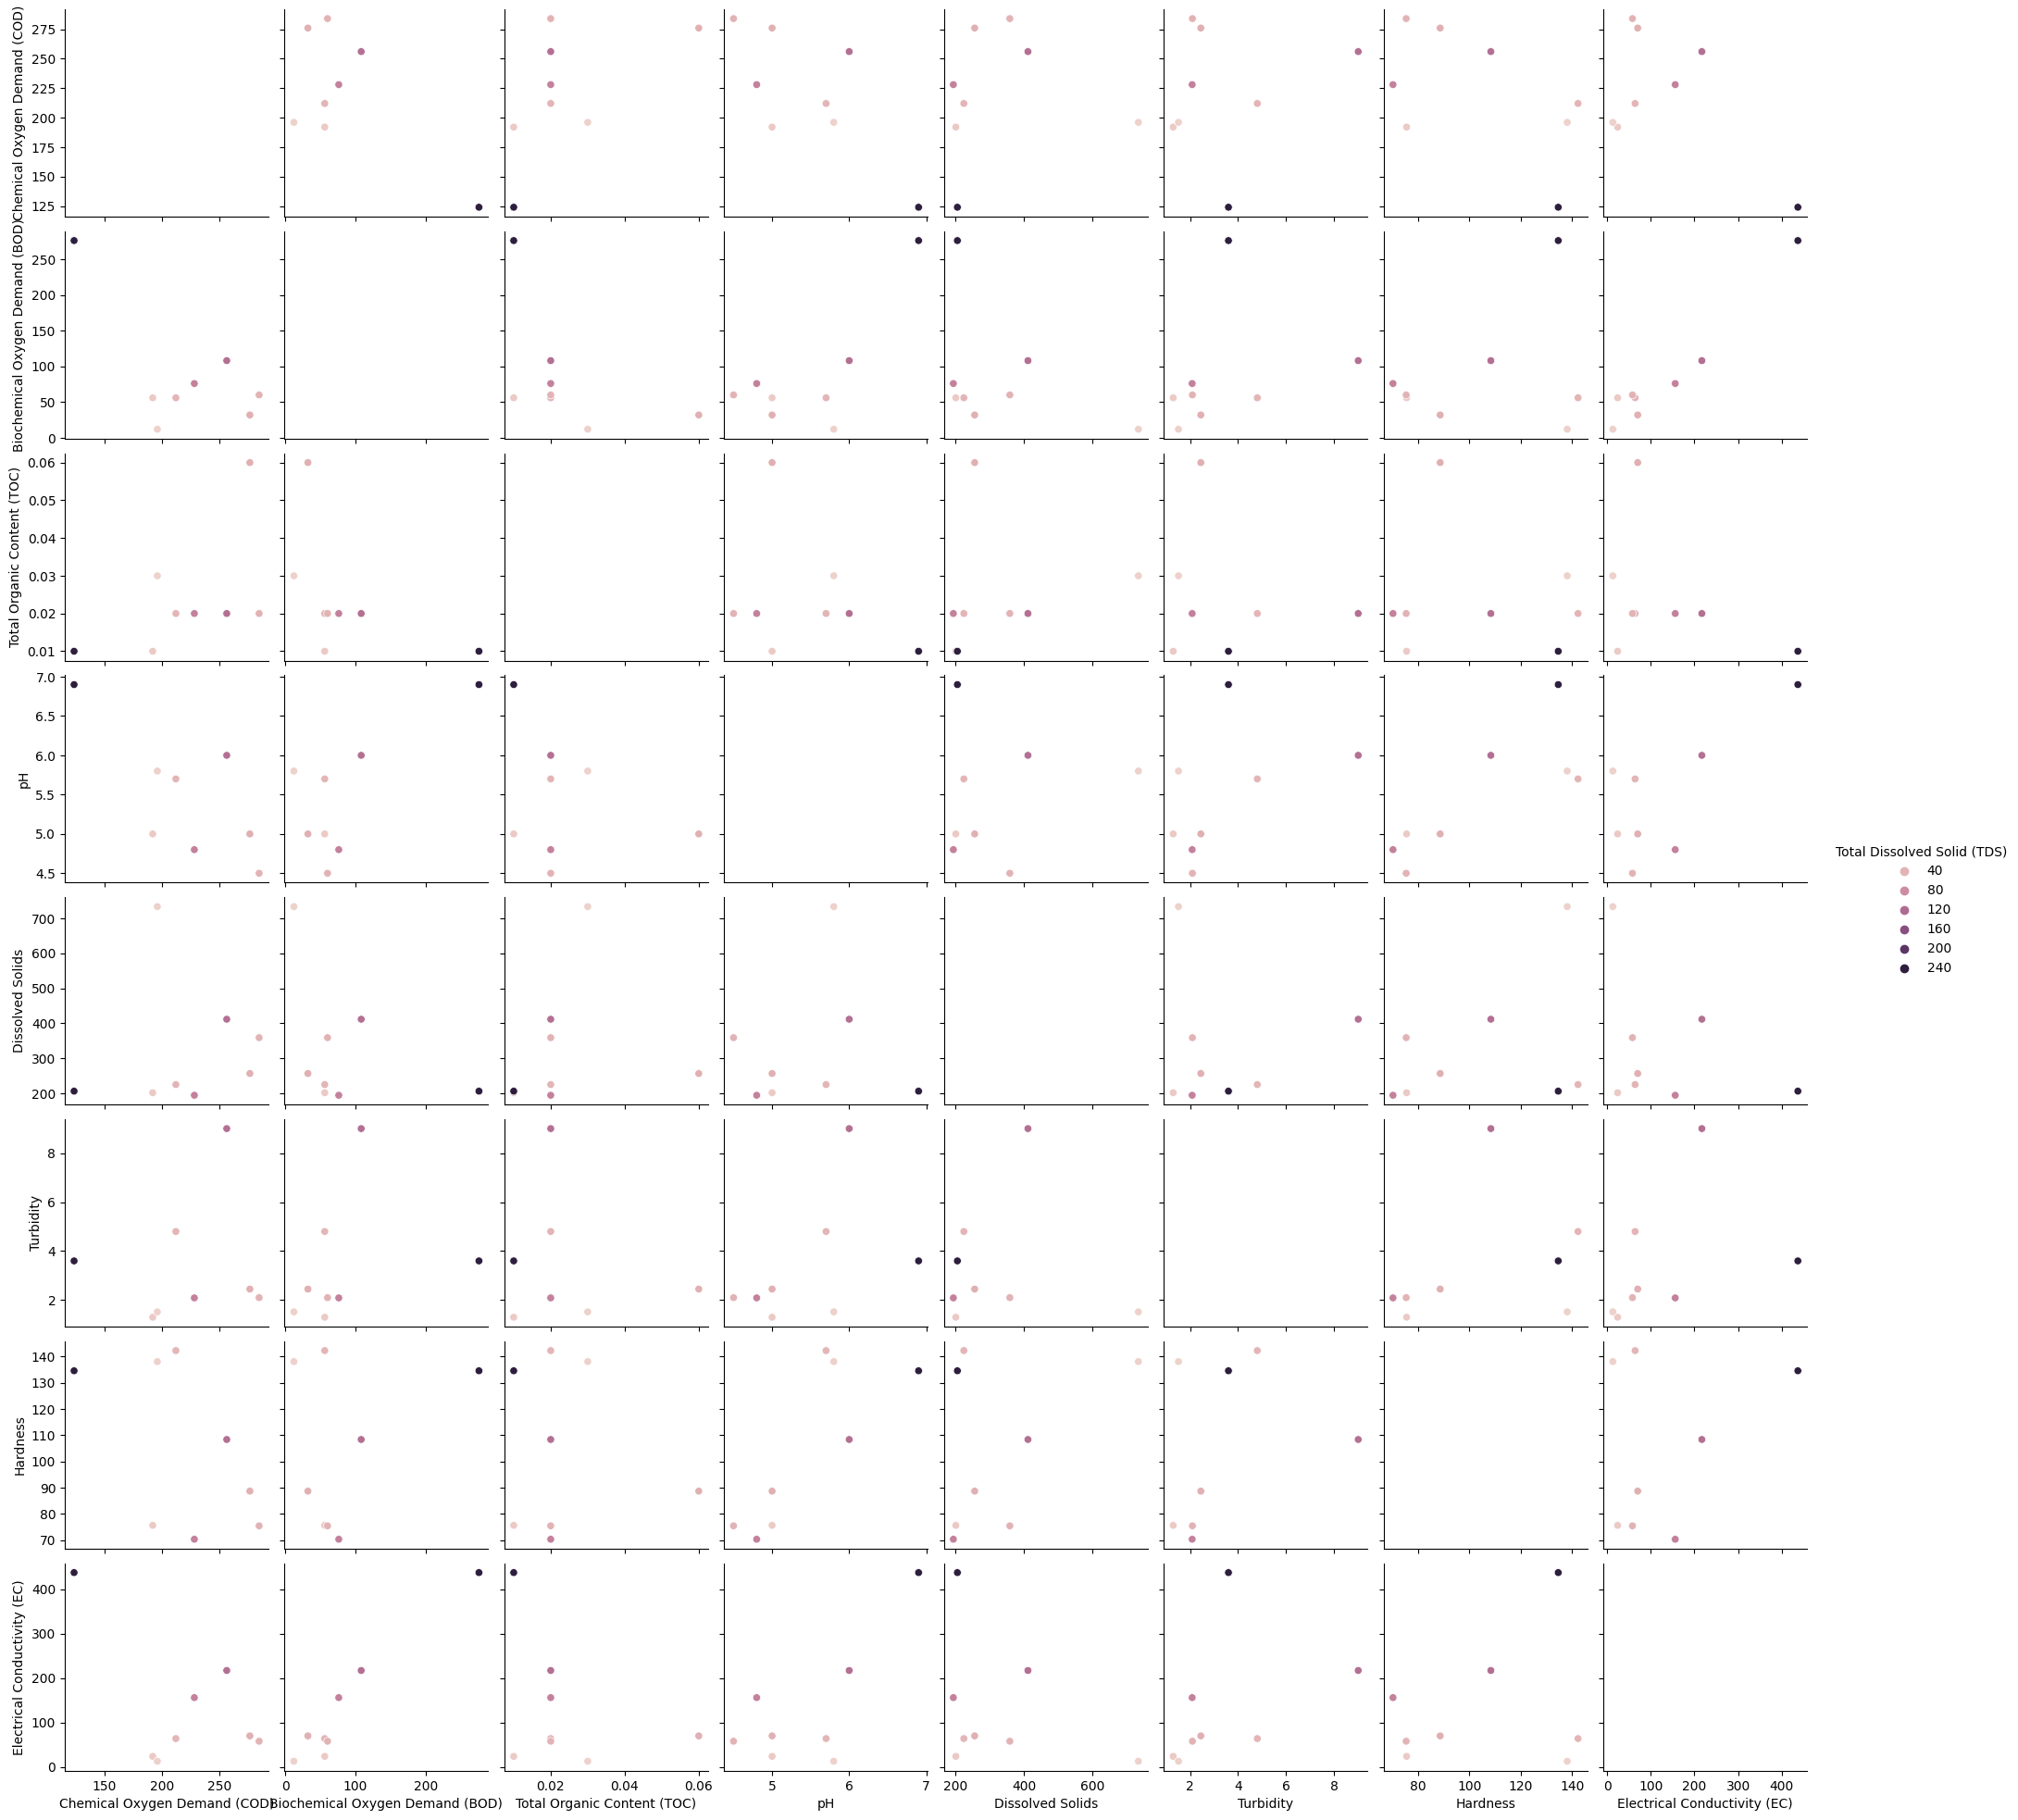

In [66]:
sns.pairplot(chemData, hue="Total Dissolved Solid (TDS)")

C:\Users\user\AppData\Local\Temp\ipykernel_11952\3791058628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Total Dissolved Solid (TDS)'])
C:\Users\user\AppData\Local\Temp\ipykernel_11952\3791058628.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Dissolved Solids'])
C

<Axes: xlabel='Electrical Conductivity (EC)', ylabel='Density'>

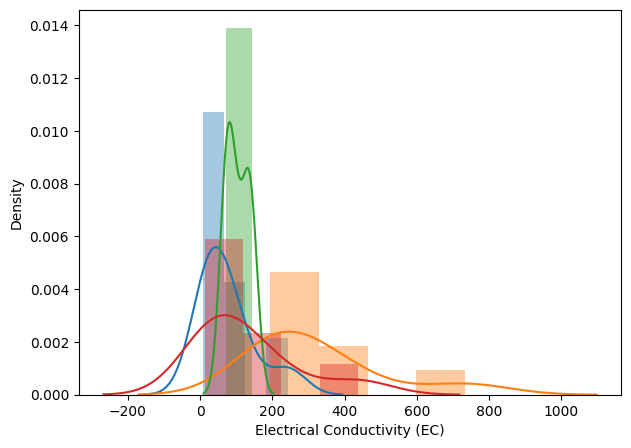

In [75]:
plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Total Dissolved Solid (TDS)'])

plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Dissolved Solids'])

C:\Users\user\AppData\Local\Temp\ipykernel_11952\129205414.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Total Dissolved Solid (TDS)'])
C:\Users\user\AppData\Local\Temp\ipykernel_11952\129205414.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Hardness'])


<Axes: xlabel='Hardness', ylabel='Density'>

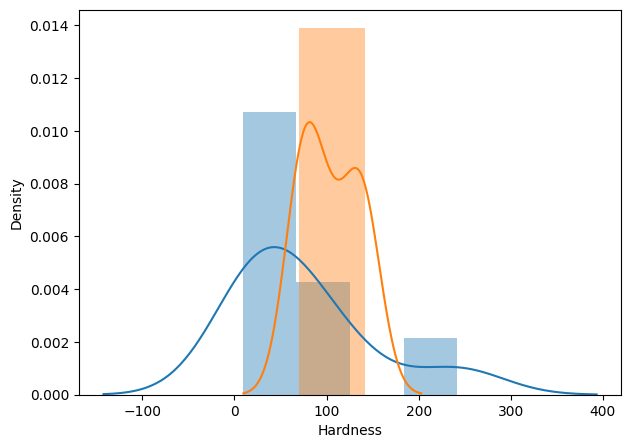

In [77]:
plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Total Dissolved Solid (TDS)'])

plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Hardness'])

C:\Users\user\AppData\Local\Temp\ipykernel_11952\3666142374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Total Dissolved Solid (TDS)'])
C:\Users\user\AppData\Local\Temp\ipykernel_11952\3666142374.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemData['Electrical Conductivi

<Axes: xlabel='Electrical Conductivity (EC)', ylabel='Density'>

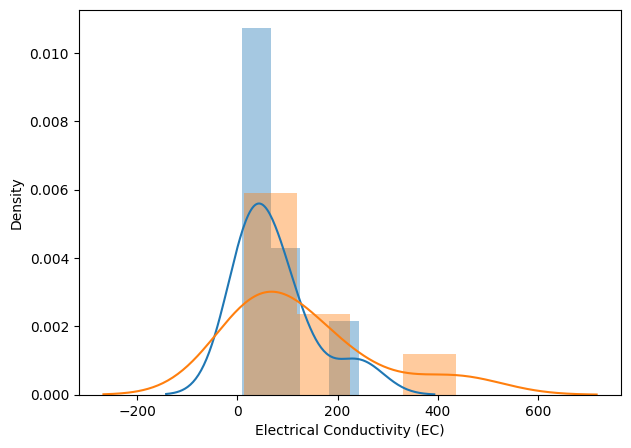

In [78]:
plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Total Dissolved Solid (TDS)'])

plt.rcParams['figure.figsize']= [7, 5]
sns.distplot(chemData['Electrical Conductivity (EC)'])

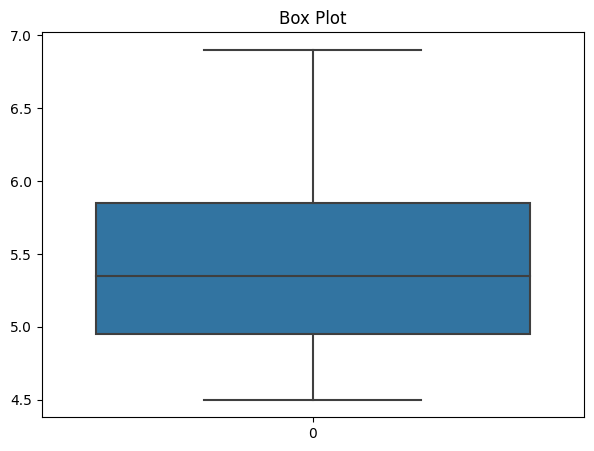

In [80]:
#individual box plot for each feature

def Box(chemData):
    plt.title("Box Plot")
    sns.boxplot(chemData)
    plt.show()
Box(chemData['pH'])


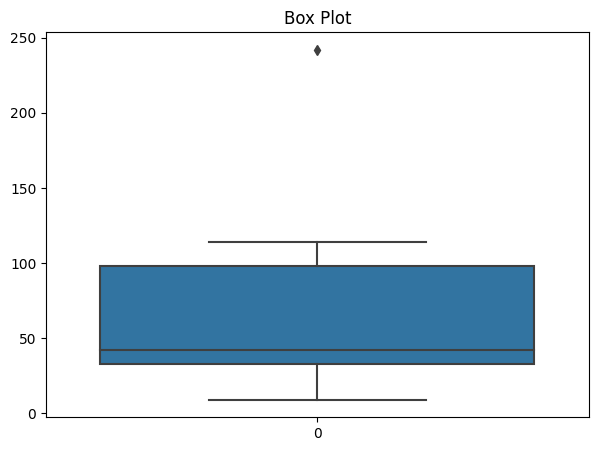

In [81]:
def Box(chemData):
    plt.title("Box Plot")
    sns.boxplot(chemData)
    plt.show()
Box(chemData['Total Dissolved Solid (TDS)'])


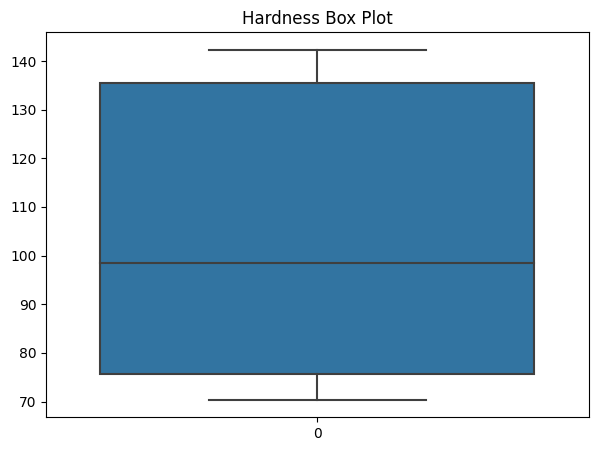

In [83]:
def Box(chemData):
    plt.title("Hardness Box Plot")
    sns.boxplot(chemData)
    plt.show()
Box(chemData['Hardness'])


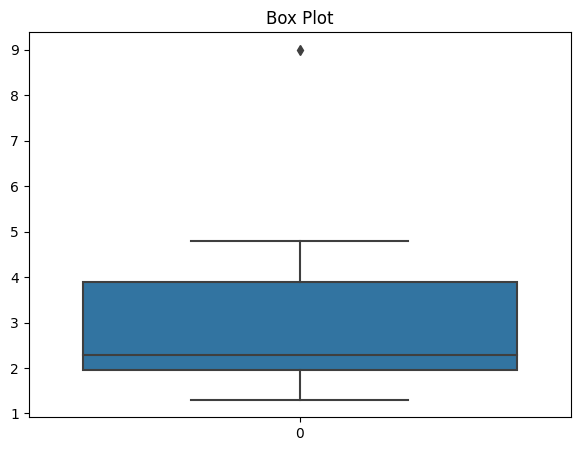

In [85]:
def Box(chemData):
    plt.title("Box Plot")
    sns.boxplot(chemData)
    plt.show()
Box(chemData['Turbidity'])


<Axes: xlabel='Hardness', ylabel='Count'>

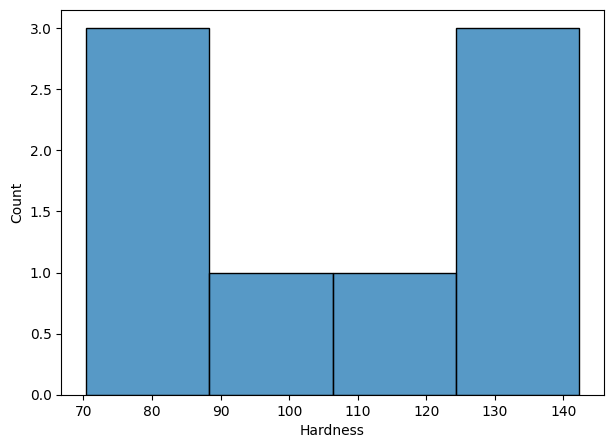

In [86]:
sns.histplot(x="Hardness", data=chemData)

In [96]:
chemData.nunique()


Total Dissolved Solid (TDS)        8
Chemical Oxygen Demand (COD)       8
Biochemical Oxygen Demand (BOD)    7
Total Organic Content (TOC)        4
pH                                 7
Turbidity                          8
Hardness                           8
Electrical Conductivity (EC)       8
dtype: int64

In [88]:
skew_val = chemData.skew().sort_values(ascending=False)
skew_val

Biochemical Oxygen Demand (BOD)    2.194964
Total Organic Content (TOC)        1.982386
Dissolved Solids                   1.925902
Turbidity                          1.867155
Total Dissolved Solid (TDS)        1.774077
Electrical Conductivity (EC)       1.740088
pH                                 0.706426
Hardness                           0.218747
Chemical Oxygen Demand (COD)      -0.653510
dtype: float64

In [74]:
chemData.head()

,Total Dissolved Solid (TDS),Chemical Oxygen Demand (COD),Biochemical Oxygen Demand (BOD),Total Organic Content (TOC),pH,Dissolved Solids,Turbidity,Hardness,Electrical Conductivity (EC)
0,114,256,108,0.02,6.0,411.6,9.00,108.40,217
1,18,192,56,0.01,5.0,201.6,1.30,75.65,24
2,38,212,56,0.02,5.7,224.9,4.80,142.30,64
3,9,196,12,0.03,5.8,733.4,1.52,138.10,13
4,41,284,60,0.02,4.5,358.9,2.10,75.48,58
